<!-- # CNN autoencoder and Clustering from MTRX data

Use this notebook to load Scienta Omicron Matrix format SPM data and create standardised images for machine learning training and analysis. The code can generate both JPG image data, useful for manually checking the data, and windowed numpy data that can be loaded into ML models. 

The notebook then creates an autoencoder for training on a large dataset, followed by KMEANS clustering. 

**Author**: Steven R. Schofield  
**Created**: November, 2024 -->

# CASTEP output analysis
## Steven R. Schofield (Universtiy College London) May 2025

### Load required modules

In [65]:
import sys
from pathlib import Path

# Define candidate paths using Path objects
module_path_list = [
    Path('/Users/steven/academic-iCloud/Python/modules'),
    Path('/hpc/srs/Python/modules')
]

data_path_list = [
    Path('/Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge'),
    Path('/hpc/srs/Python-data')
]

# Resolve actual paths
module_path = next((p for p in module_path_list if p.exists()), None)
data_path = next((p for p in data_path_list if p.exists()), None)

# Check and report missing paths
if module_path is None:
    print("Error: Could not locate a valid module path.")
if data_path is None:
    print("Error: Could not locate a valid data path.")

if module_path is None or data_path is None:
    sys.exit(1)

# Add module_path to sys.path if needed
if str(module_path) not in sys.path:
    sys.path.insert(0, str(module_path))

# Print resolved paths
print(f"module_path = {module_path}")
print(f"data_path = {data_path}")


module_path = /Users/steven/academic-iCloud/Python/modules
data_path = /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge


In [66]:
# # Ensure modules are reloaded 
%load_ext autoreload
%autoreload 2

# Import standard modules
import numpy as np
import pandas as pd

# Import custom module
import SRSCALCUTILS.castep_tools as ct

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Programme variable setup

In [67]:
# Parameters for windows creation
# General
job_folder = '1x6x8/1x6x8-821MP-SP-negative'
job_path = data_path / job_folder
verbose = False             # Set this True to print out more information

# Print resolved paths
print(f"job_path = {job_path}")

job_path = /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/1x6x8/1x6x8-821MP-SP-negative



                                               FILE: L8_clean.castep                                                
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/1x6x8/1x6x8-821MP-SP-negative/L8_clean   

Final enthalpy = -8363.55887 eV.


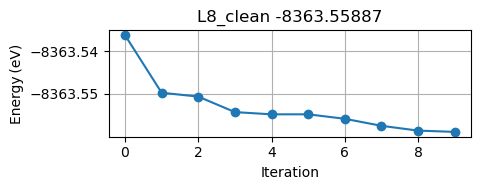

,Cell parameters,Value
0,ax,3.866835
1,ay,23.201008
2,az,25.937060
3,nx,1.000000
4,ny,6.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,none
2,number of electrons,205.0
3,net charge of system,-1.0
4,net spin of system,1.0
5,number of up spins,103.0
6,number of down spins,102.0
7,number of bands,124.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


In [79]:
castep_paths = ct.find_all_files_by_extension(job_path, extension=".castep")

for castep_path in castep_paths:
    # Header and error information
    ct.print_file_info(castep_path)
    #ct.extract_warnings(castep_path,verbose=True)

    # Energy convergence
    convergence = ct.extract_LBFGS_energies(castep_path)
    final_enthalpy = ct.extract_LBFGS_final_enthalpy(castep_path)
    print('Final enthalpy = {} eV.'.format(final_enthalpy))
    ct.plot_energy_vs_iteration(convergence, title=castep_path.stem+' '+str(final_enthalpy),figsize=(5,2))
    
    # Unit cell parameters
    cell = ct.extract_lattice_parameters(castep_path,a0=3.8668346, vac=15.0)
    cell_df = pd.DataFrame(cell.items(), columns=["Cell parameters", "Value"])
    display(cell_df) 

    # General parameters
    general_params = ct.extract_summary_parameters(castep_path)
    general_params_df = pd.DataFrame(general_params.items(), columns=["General parameter", "Value"])
    display(general_params_df) 

    break

    
    

    
    
    

In [75]:
data_summary = ct.collect_summary_table(job_path)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_summary)

,File,RelPath,nx,ny,nz,kx,ky,kz,Cut-off (eV),Net Charge,Net Spin,Final Enthalpy (eV)
0,L8_clean,L8_clean,1,6,8,8,2,1,800.0000 eV,-1.0,1.0,-8363.55887
1,L8_Hbb,L8_Hbb,1,6,8,8,2,1,800.0000 eV,-1.0,0.0,-8479.38580
2,L8_1di,L8_1di,1,6,8,8,2,1,800.0000 eV,-1.0,1.0,-8496.08947
3,L8_DB,L8_DB,1,6,8,8,2,1,800.0000 eV,-1.0,0.0,-8447.71313
4,L8_mono,L8_mono,1,6,8,8,2,1,800.0000 eV,-1.0,1.0,-8464.20940
5,L8_Ob,L8_Ob,1,6,8,8,2,1,800.0000 eV,-1.0,1.0,-8905.24618
6,L8_3x1,L8_3x1,1,6,8,8,2,1,800.0000 eV,-1.0,1.0,-8496.17906
7,L8_di,L8_di,1,6,8,8,2,1,800.0000 eV,-1.0,1.0,-8558.20589
8,L8_Hb,L8_Hb,1,6,8,8,2,1,800.0000 eV,-1.0,0.0,-8479.09956


In [84]:
castep_paths[0]

PosixPath('/Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/1x6x8/1x6x8-821MP-SP-negative/L8_clean/L8_clean.castep')

In [90]:
atoms = ct.extract_final_fractional_positions(castep_paths[0])
view(atoms)

AttributeError: 'tuple' object has no attribute 'iterimages'

In [ ]:
from ase.io import read
from ase.visualize import view


atoms = read(geom_paths[0])  # or .castep, .traj, etc.
view(atoms)


KeyError: 'H:D'

In [102]:
from ase import Atoms
from ase.visualize import view  # opens an external GUI window
# or for inline Jupyter:
import nglview as nv        # pip install nglview

def view_fractional_structure(castep_path):
    # 1. extract fractional positions and lattice
    fracs = ct.extract_final_fractional_positions(castep_path)   # returns [(symbol,u,v,w),…]
    lat   = ct.extract_lattice_parameters(castep_path)           # {'a':…, 'b':…, 'c':…, …}

    print(fracs)
    print(lat)
    # 2. clean up symbols and build lists
    symbols = [s.split(':')[0] for s, u, v, w in fracs]  # drop any “:D” suffix
    scaled_positions = [(u, v, w) for s, u, v, w in fracs]

    # 3. assemble cell matrix (orthogonal example)
    a, b, c = lat['ax'], lat['ay'], lat['az']
    cell = [[a, 0, 0],
            [0, b, 0],
            [0, 0, c]]

    # 4. build the Atoms object
    atoms = Atoms(symbols=symbols,
                  scaled_positions=scaled_positions,
                  cell=cell,
                  pbc=True)

    # 5a. external viewer
    nv(atoms)

    # 5b. or inline with NGLView
    # return nv.show_ase(atoms)


In [103]:
view_fractional_structure(castep_paths[0])

[('Si', 0.0, 0.116965, 0.359051), ('Si', 0.0, 0.216369, 0.359051), ('Si', -0.0, 0.450298, 0.359051), ('Si', 0.0, 0.549702, 0.359051), ('Si', -0.0, 0.783631, 0.359051), ('Si', -0.0, 0.883035, 0.359051), ('Si', 0.5, 0.087961, 0.315851), ('Si', 0.5, 0.245372, 0.315851), ('Si', 0.5, 0.421295, 0.315851), ('Si', 0.5, 0.578705, 0.315851), ('Si', 0.5, 0.754628, 0.315851), ('Si', 0.5, 0.912039, 0.315851), ('Si', 0.5, 0.0, 0.26856), ('Si', 0.5, 0.166667, 0.258103), ('Si', 0.5, 0.333333, 0.26856), ('Si', 0.5, 0.5, 0.258103), ('Si', 0.5, 0.666667, 0.26856), ('Si', 0.5, 0.833333, 0.258103), ('Si', 0.0, 0.0, 0.214099), ('Si', 0.0, 0.166667, 0.206948), ('Si', -0.0, 0.333333, 0.214099), ('Si', 0.0, 0.5, 0.206948), ('Si', 0.0, 0.666667, 0.214099), ('Si', -0.0, 0.833333, 0.206948), ('Si', 0.0, 0.081716, 0.157815), ('Si', 0.0, 0.251617, 0.157815), ('Si', -0.0, 0.415049, 0.157815), ('Si', -0.0, 0.584951, 0.157815), ('Si', 0.0, 0.748383, 0.157815), ('Si', -0.0, 0.918284, 0.157815), ('Si', 0.5, 0.082461, 0.

TypeError: 'module' object is not callable

In [104]:
params = {'task' : 'geomopt',
          'xc_functional' : 'PBE',
          'cut_off_energy' : 750,
          'spin_polarised' : 'true',
          'write_cell_structure' : 'true',
          'charge' : 0}

In [108]:
print(params['task'])

geomopt


In [ ]:
def write_param_file(params):
    width = max(len(k) for k in params)
    for param, value in params.items():
        print(f'{param:<{width+1}} : {value}')

task                  : geomopt
xc_functional         : PBE
cut_off_energy        : 750
spin_polarised        : true
write_cell_structure  : true
charge                : 0
